## Q–Q plot

In statistics, a Q–Q plot (quantile–quantile plot) is a probability plot, a graphical method for **comparing two probability distributions** by plotting their quantiles against each other.

- If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line `y = x`. 

- If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line `y = x`. 


In practice, Q-Q plot are used to **check normality** assumption of a dataset.

In [ ]:
# Setup
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### If the sample is normal

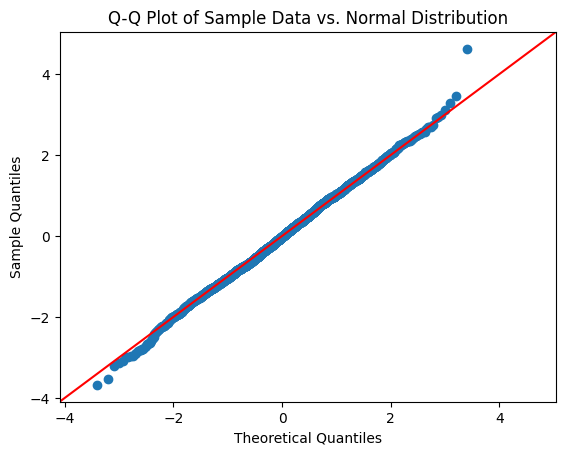

In [8]:
# Generate some sample data (e.g., normally distributed)
data = np.random.normal(loc=0, scale=1, size=3000)

# Create the Q-Q plot against a normal distribution
fig = sm.qqplot(data, line='45') # '45' adds a 45-degree reference line
plt.title("Q-Q Plot of Sample Data vs. Normal Distribution")
plt.show()

### Other sample shape

In [9]:
from scipy import stats

def my_qqplot(sample, title):
    sm.qqplot(sample, line="s")  # "s" = standardized line using sample mean/std
    plt.title(title)
    plt.tight_layout()
    plt.show()

rng = np.random.default_rng(326)
n = 3000  # larger n to better see tail behavior


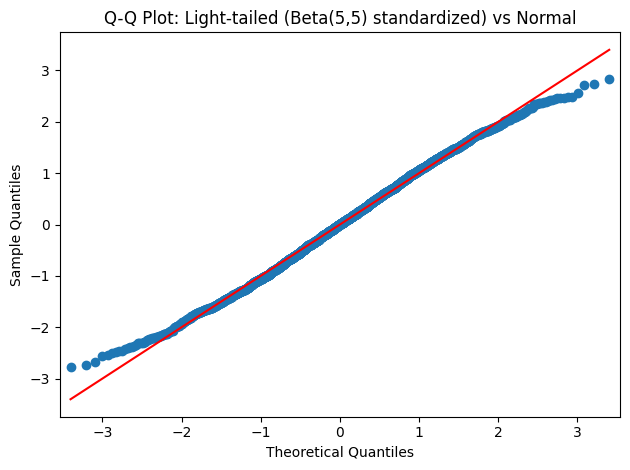

In [10]:
# 1) Light-tailed (bounded) – symmetric Beta scaled to ~N(0,1) range
x_light = rng.beta(5, 5, size=n)
x_light = (x_light - x_light.mean()) / x_light.std()
my_qqplot(x_light,      "Q-Q Plot: Light-tailed (Beta(5,5) standardized) vs Normal")

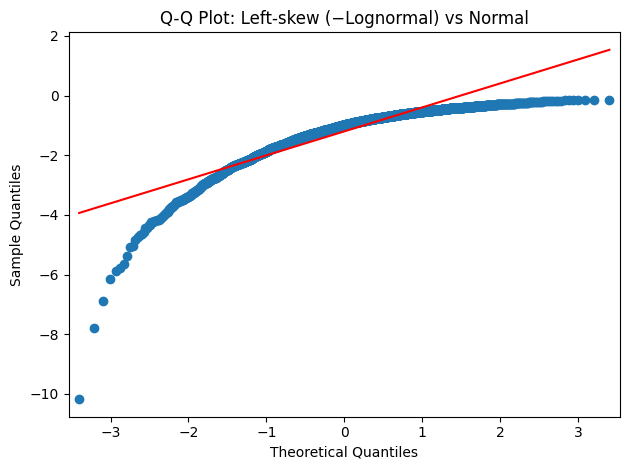

In [11]:
# 2) Left-skew – reflect a lognormal
x_left_skew = -rng.lognormal(mean=0.0, sigma=0.6, size=n)
my_qqplot(x_left_skew,  "Q-Q Plot: Left-skew (−Lognormal) vs Normal")

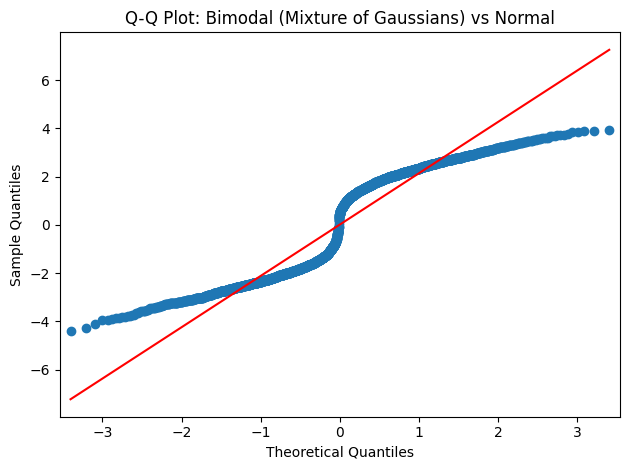

In [12]:
# 3) Bimodal – mixture of two Gaussians
mix = rng.choice([-2.0, 2.0], size=n) + rng.normal(0, 0.7, size=n)
x_bimodal = mix
my_qqplot(x_bimodal,    "Q-Q Plot: Bimodal (Mixture of Gaussians) vs Normal")

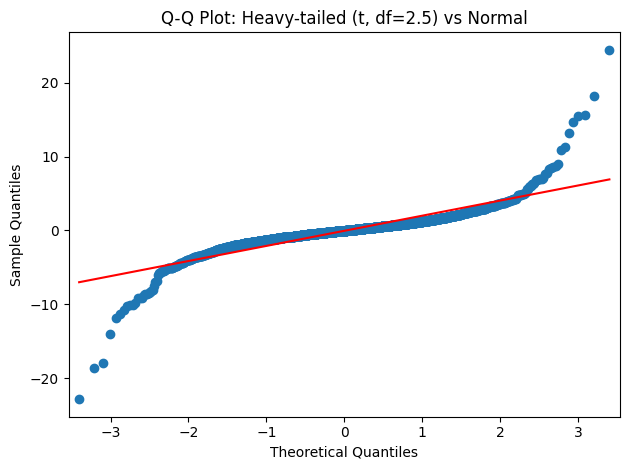

In [13]:
# 4) Heavy-tailed – Student’s t with small df
x_heavy = stats.t.rvs(df=2.5, size=n, random_state=rng)
my_qqplot(x_heavy,      "Q-Q Plot: Heavy-tailed (t, df=2.5) vs Normal")

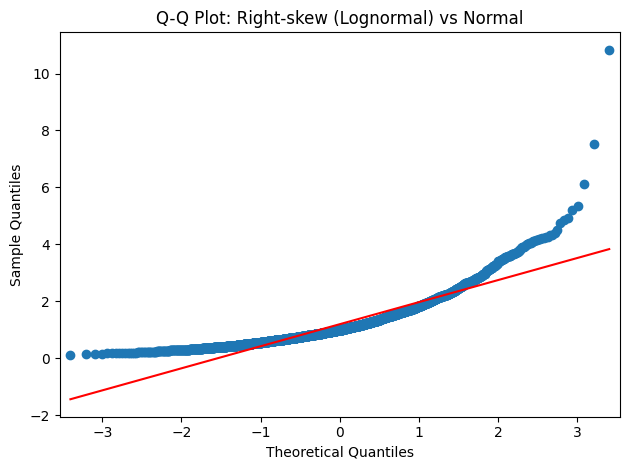

In [14]:
# 5) Right-skew – lognormal
x_right_skew = rng.lognormal(mean=0.0, sigma=0.6, size=n)
my_qqplot(x_right_skew, "Q-Q Plot: Right-skew (Lognormal) vs Normal")